<font color='tomato'><font color="#CC3D3D"><p>
# How to Build Neural Networks using Keras
https://www.tensorflow.org/tutorials?hl=ko    

### Import modules

In [1]:
import pandas as pd
import numpy as np
import os
import random
import pickle
from IPython.display import Image
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.1.2


### Set random seeds to make your results reproducible

In [2]:
# 매번 모델링을 할 때마다 동일한 결과를 얻으려면 아래 코드를 실행해야 함.

def reset_seeds(reset_graph_with_backend=None):
    if reset_graph_with_backend is not None:
        K = reset_graph_with_backend
        K.clear_session()
        tf.compat.v1.reset_default_graph()
        print("KERAS AND TENSORFLOW GRAPHS RESET")  # optional

    np.random.seed(1234)
    random.seed(1234)
    tf.compat.v1.set_random_seed(1234)
    os.environ['CUDA_VISIBLE_DEVICES'] = ''  # for GPU
    print("RANDOM SEEDS RESET")  # optional
   
reset_seeds()

RANDOM SEEDS RESET


### Step 1: Load and process the data

##### Read data

In [8]:
X_train_cat = pd.read_csv(os.path.abspath("../dat")+'/X_train_cat_stand.csv')
X_test_cat = pd.read_csv(os.path.abspath("../dat")+'/X_test_cat_stand.csv')

In [9]:
X_cat = pd.concat([X_train_cat,X_test_cat])

In [10]:
X_cat

,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,N.B,...,v391,v392,v393,v394,v395,v396,v397,v398,v399,v400
0,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,-0.304962,...,7.560749e-02,9.589238e-02,0.088358,0.070760,0.070678,6.077706e-02,8.076409e-02,0.100228,0.069038,0.110333
1,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,-0.304962,...,1.553139e-02,1.153790e-02,0.040885,0.007141,0.045468,9.454343e-02,1.824397e-02,0.034277,0.072813,0.075302
2,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,-0.304962,...,6.633068e-02,4.137643e-02,0.030814,0.018366,0.004605,5.845007e-02,8.780898e-02,0.022359,0.037469,0.057620
3,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,-0.304962,...,8.682396e-02,6.745478e-02,0.054063,0.068822,0.068662,6.213156e-02,8.322296e-02,0.075809,0.061920,0.100810
4,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,-0.304962,...,2.712422e-02,6.256062e-02,0.086565,0.037614,0.098600,1.084751e-01,6.065368e-02,0.091441,0.013005,0.112134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,0.0,0.0,0.0,-0.335434,-0.267333,0.0,3.488838,-0.29369,0.0,-0.304962,...,5.417856e-02,5.970265e-02,0.095645,0.100328,0.071834,9.010550e-02,8.475790e-02,0.069377,0.060324,0.167648
2478,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,-0.304962,...,7.450581e-09,1.490116e-08,0.000000,0.000000,0.000000,1.490116e-08,1.490116e-08,0.000000,0.000000,0.000000
2479,0.0,0.0,0.0,-0.335434,-0.267333,0.0,0.893200,-0.29369,0.0,3.279094,...,9.611680e-02,9.740031e-02,0.134786,0.080993,0.067191,1.044640e-01,1.124931e-01,0.091201,0.070722,0.111803
2480,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,3.279094,...,9.573798e-02,3.246385e-02,0.064083,0.034969,0.098137,9.950434e-02,8.348648e-02,0.064315,0.068996,0.065925


In [12]:
# BOW feature 제거
X_cat = X_cat.iloc[:,331:]

In [13]:
X_cat

,v168,v169,v170,v171,v172,v173,v174,v175,v176,v177,...,v391,v392,v393,v394,v395,v396,v397,v398,v399,v400
0,-0.283978,-0.185856,-0.140162,-0.203218,-0.291189,-0.185811,-0.193280,-0.090172,-0.299822,-0.120228,...,7.560749e-02,9.589238e-02,0.088358,0.070760,0.070678,6.077706e-02,8.076409e-02,0.100228,0.069038,0.110333
1,-0.045243,-0.000476,-0.054318,0.109366,-0.067651,0.060900,-0.067182,-0.048911,-0.054673,-0.081361,...,1.553139e-02,1.153790e-02,0.040885,0.007141,0.045468,9.454343e-02,1.824397e-02,0.034277,0.072813,0.075302
2,-0.049396,-0.066619,-0.120679,-0.078058,-0.182741,-0.003616,-0.094585,-0.020640,-0.026311,-0.120228,...,6.633068e-02,4.137643e-02,0.030814,0.018366,0.004605,5.845007e-02,8.780898e-02,0.022359,0.037469,0.057620
3,-0.174053,-0.156196,-0.057987,-0.203218,-0.210487,-0.143877,-0.039220,-0.179491,-0.056324,-0.178457,...,8.682396e-02,6.745478e-02,0.054063,0.068822,0.068662,6.213156e-02,8.322296e-02,0.075809,0.061920,0.100810
4,-0.049396,-0.024156,-0.003801,-0.078058,-0.153878,-0.163587,0.043695,-0.027759,-0.118100,-0.120228,...,2.712422e-02,6.256062e-02,0.086565,0.037614,0.098600,1.084751e-01,6.065368e-02,0.091441,0.013005,0.112134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,-0.049396,-0.098364,-0.030834,-0.148930,-0.171361,-0.185811,-0.196764,-0.134214,-0.131895,-0.120228,...,5.417856e-02,5.970265e-02,0.095645,0.100328,0.071834,9.010550e-02,8.475790e-02,0.069377,0.060324,0.167648
2478,-0.022788,-0.152681,-0.005513,-0.030904,0.037669,-0.141763,0.129124,0.174951,-0.019467,0.061461,...,7.450581e-09,1.490116e-08,0.000000,0.000000,0.000000,1.490116e-08,1.490116e-08,0.000000,0.000000,0.000000
2479,-0.133264,-0.152681,-0.120679,-0.217123,-0.233949,-0.160041,-0.196764,-0.149982,-0.275242,-0.149756,...,9.611680e-02,9.740031e-02,0.134786,0.080993,0.067191,1.044640e-01,1.124931e-01,0.091201,0.070722,0.111803
2480,-0.150861,-0.119193,-0.072741,-0.157929,-0.177070,-0.027115,-0.083651,-0.090172,-0.108148,-0.149756,...,9.573798e-02,3.246385e-02,0.064083,0.034969,0.098137,9.950434e-02,8.348648e-02,0.064315,0.068996,0.065925


In [14]:
train = pd.read_csv(os.path.abspath("../dat")+'/train_transactions.csv', encoding='cp949')
test = pd.read_csv(os.path.abspath("../dat")+'/test_transactions.csv', encoding='cp949')
y_train = pd.read_csv(os.path.abspath("../dat")+'/y_train.csv').gender

In [15]:
train

,cust_id,tran_date,store_nm,goods_id,gds_grp_nm,gds_grp_mclas_nm,amount
0,0,2007-01-19 00:00:00,강남점,127105,기초 화장품,화장품,850000
1,0,2007-03-30 00:00:00,강남점,342220,니 트,시티웨어,480000
2,0,2007-03-30 00:00:00,강남점,127105,기초 화장품,화장품,3000000
3,0,2007-03-30 00:00:00,강남점,342205,니 트,시티웨어,840000
4,0,2007-03-30 00:00:00,강남점,342220,상품군미지정,기타,20000
...,...,...,...,...,...,...,...
231999,3499,2007-12-17 00:00:00,본 점,127129,상품군미지정,기타,-135000
232000,3499,2007-12-23 00:00:00,노원점,285136,시티웨어,시티웨어,6380000
232001,3499,2007-12-23 00:00:00,노원점,39107,야채,농산물,40800
232002,3499,2007-12-27 00:00:00,본 점,740120,어덜트,명품,4880000


In [16]:
train_id = train['cust_id']
test_id = test['cust_id']

In [17]:
X_cat['cust_id'] = np.arange(0,5982,1)

In [18]:
# X_cat = pd.concat([pd.concat([train_id, test_id]).reset_index(drop=True), X_cat], axis=1)
X_train_stand = X_cat.query('cust_id in @train_id').drop('cust_id', axis=1)
X_test_stand = X_cat.query('cust_id in @test_id').drop('cust_id', axis=1)

In [19]:
X_train_cat = X_train_cat.iloc[:,331:]

In [20]:
X_train = X_train_cat.sample(n=2450, random_state=0);X_train

,총구매액,구매건수,평균구매액,최대구매액,월,일,휴면_여부,화장품 구매금액,화장품 구매건수,평일방문비율,...,v391,v392,v393,v394,v395,v396,v397,v398,v399,v400
1269,-0.698278,-0.674468,-0.658613,-0.728978,0.998282,-0.130376,1.877214,-0.530772,-0.620747,-1.051729,...,0.087737,0.062577,0.033822,0.018723,0.027951,0.089686,0.082654,0.119424,0.036627,0.116316
118,1.244205,1.734880,-0.392583,0.582279,0.709192,1.002884,-0.705496,0.273641,0.456511,-0.184858,...,0.095549,0.080712,0.084716,0.072392,0.080213,0.085300,0.083502,0.095524,0.080923,0.123296
2809,-0.708119,-0.647697,-0.821286,-0.767003,0.998282,-0.923658,0.694293,-0.530772,-0.620747,-1.051729,...,0.133763,0.033678,0.063893,0.102914,0.053529,0.089926,0.058888,0.077353,0.066669,0.076365
2620,0.486785,-0.179213,0.585800,0.696241,0.420103,-0.357028,-0.557631,-0.530772,-0.620747,1.023468,...,0.118324,0.074620,0.118242,0.064929,0.076786,0.123091,0.125826,0.098087,0.122346,0.105672
1535,-0.492657,-0.460304,-0.366115,-0.180550,-0.447166,-1.490289,-0.577346,0.055117,0.456511,0.774444,...,0.047454,0.093996,0.063548,0.061892,0.078760,0.063501,0.083870,0.098542,0.060872,0.112707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,-0.712351,-0.714624,-0.577885,-0.785381,-1.314434,-1.036984,1.226608,-0.530772,-0.620747,-1.051729,...,0.046236,0.023382,0.030214,0.007582,0.016145,0.013262,0.141491,0.015547,0.005723,0.133485
1440,-0.723935,-0.647697,-0.930661,-0.851569,0.131013,-0.583680,1.818068,-0.530772,-0.620747,-1.051729,...,0.093095,0.091580,0.037614,0.071551,0.040183,0.090620,0.060452,0.084415,0.096039,0.097414
2823,-0.563636,-0.607541,-0.089114,-0.457075,0.998282,-0.583680,0.043687,-0.279352,-0.351433,2.085969,...,0.071981,0.093071,0.083562,0.065184,0.062161,0.055536,0.081731,0.068744,0.062172,0.094656
3415,-0.723935,-0.701238,-0.923979,-0.851569,-0.736255,-1.036984,1.995506,-0.530772,-0.620747,-1.051729,...,0.021766,0.133697,0.083420,0.023375,0.095586,0.042388,0.079702,0.125465,0.070695,0.132998


In [21]:
X_test = X_train_cat.drop(index=X_train.index); X_test

,총구매액,구매건수,평균구매액,최대구매액,월,일,휴면_여부,화장품 구매금액,화장품 구매건수,평일방문비율,...,v391,v392,v393,v394,v395,v396,v397,v398,v399,v400
0,-0.138166,0.249115,-0.537409,-0.320017,-1.603523,0.436254,-0.735069,0.925839,1.264455,0.785662,...,7.560749e-02,9.589238e-02,8.835848e-02,7.076018e-02,7.067763e-02,6.077706e-02,8.076409e-02,1.002284e-01,6.903814e-02,1.103333e-01
3,-0.588164,-0.152443,-0.795103,-0.624811,-1.025344,1.682841,-0.636492,-0.530772,-0.620747,0.057558,...,8.682396e-02,6.745478e-02,5.406320e-02,6.882238e-02,6.866223e-02,6.213156e-02,8.322296e-02,7.580862e-02,6.191984e-02,1.008104e-01
7,2.817847,1.480560,0.469194,0.442812,-0.447166,-0.243702,-0.754784,3.135792,2.880342,-0.274655,...,9.264483e-02,8.646971e-02,1.077908e-01,8.092587e-02,8.516842e-02,9.873082e-02,1.005335e-01,7.740650e-02,8.594979e-02,1.146358e-01
12,-0.701795,-0.714624,-0.294779,-0.743281,-0.158076,-0.697006,1.364615,-0.530772,-0.620747,-1.051729,...,1.233909e-01,7.128987e-02,1.768662e-02,1.014937e-03,7.233571e-03,8.838341e-02,8.142357e-02,3.966023e-02,9.055600e-02,5.806924e-02
21,1.070657,2.899397,-0.900663,0.114180,0.131013,-0.470354,-0.794215,1.796431,1.803084,-0.123416,...,1.024445e-01,7.517093e-02,8.581185e-02,6.241694e-02,7.187866e-02,9.365624e-02,7.701229e-02,9.230841e-02,9.083623e-02,1.025364e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,-0.356745,-0.567386,0.562639,0.023642,0.998282,0.549580,-0.705496,0.141410,0.187197,-1.051729,...,5.000011e-02,1.003352e-01,7.946575e-02,8.047812e-02,5.541629e-02,4.764199e-02,8.041442e-02,9.243301e-02,6.476846e-02,1.229698e-01
3477,-0.589126,-0.701238,1.496650,-0.176216,1.287371,-1.376963,1.571626,-0.530772,-0.620747,-1.051729,...,8.324955e-02,2.183798e-02,1.303304e-01,4.028463e-02,7.769891e-02,1.591550e-02,7.070465e-02,5.065443e-02,4.754799e-02,1.214675e-01
3493,0.045769,2.765545,-0.805892,-0.290592,1.287371,1.002884,-0.803580,-0.384786,-0.351433,-0.080347,...,8.048776e-02,1.016681e-01,1.072638e-01,6.946047e-02,9.109537e-02,1.004442e-01,9.108846e-02,7.439225e-02,8.498194e-02,1.015891e-01
3497,-0.723935,-0.728009,-0.929374,-0.851569,1.287371,1.682841,2.291236,-0.530772,-0.620747,-1.051729,...,1.490116e-08,7.450581e-09,3.725290e-09,0.000000e+00,3.725290e-09,3.725290e-09,0.000000e+00,0.000000e+00,2.793968e-09,7.450581e-09


In [22]:
y_train1 = y_train.sample(n=2450, random_state=0)

In [23]:
y_train1

1269    0
118     0
2809    0
2620    1
1535    0
       ..
919     0
1440    0
2823    0
3415    1
2929    0
Name: gender, Length: 2450, dtype: int64

In [24]:
y_test = y_train.drop(index=y_train1.index); y_test

0       0
3       1
7       0
12      1
21      1
       ..
3474    0
3477    1
3493    0
3497    0
3498    0
Name: gender, Length: 1050, dtype: int64

In [25]:
X_test_stand

,v168,v169,v170,v171,v172,v173,v174,v175,v176,v177,...,v391,v392,v393,v394,v395,v396,v397,v398,v399,v400
0,-0.054105,-0.098364,-0.046942,-0.189154,-0.190282,-0.153413,-0.276962,-0.186518,-0.106734,-0.149756,...,9.434843e-02,7.112270e-02,0.124249,0.085191,0.089609,8.424115e-02,9.138238e-02,0.086272,0.064496,0.159226
1,-0.163473,-0.152681,-0.116244,-0.175980,-0.168498,-0.185811,-0.114992,-0.234813,-0.275242,-0.120228,...,8.180444e-02,9.445114e-02,0.087596,0.083680,0.101941,9.815012e-02,7.711962e-02,0.064315,0.081441,0.138366
2,-0.283978,-0.147340,-0.183768,-0.203218,-0.216679,-0.179207,-0.168572,-0.179491,-0.159146,-0.207165,...,1.045667e-01,7.859262e-02,0.098067,0.069088,0.073532,9.213998e-02,8.649695e-02,0.080370,0.090637,0.098651
3,-0.132944,-0.038847,-0.003801,-0.157518,-0.153878,-0.163587,-0.126968,-0.104277,-0.118100,-0.120228,...,8.276366e-02,1.022891e-01,0.095721,0.040901,0.063503,9.009846e-02,5.594728e-02,0.103536,0.089741,0.079455
4,-0.283978,-0.131320,-0.057832,-0.157518,-0.153878,-0.130195,-0.074943,-0.104277,-0.038670,-0.120228,...,6.209652e-02,8.425052e-02,0.083078,0.076083,0.052955,7.453633e-02,7.667042e-02,0.075760,0.074285,0.121904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,-0.049396,-0.098364,-0.030834,-0.148930,-0.171361,-0.185811,-0.196764,-0.134214,-0.131895,-0.120228,...,5.417856e-02,5.970265e-02,0.095645,0.100328,0.071834,9.010550e-02,8.475790e-02,0.069377,0.060324,0.167648
2478,-0.022788,-0.152681,-0.005513,-0.030904,0.037669,-0.141763,0.129124,0.174951,-0.019467,0.061461,...,7.450581e-09,1.490116e-08,0.000000,0.000000,0.000000,1.490116e-08,1.490116e-08,0.000000,0.000000,0.000000
2479,-0.133264,-0.152681,-0.120679,-0.217123,-0.233949,-0.160041,-0.196764,-0.149982,-0.275242,-0.149756,...,9.611680e-02,9.740031e-02,0.134786,0.080993,0.067191,1.044640e-01,1.124931e-01,0.091201,0.070722,0.111803
2480,-0.150861,-0.119193,-0.072741,-0.157929,-0.177070,-0.027115,-0.083651,-0.090172,-0.108148,-0.149756,...,9.573798e-02,3.246385e-02,0.064083,0.034969,0.098137,9.950434e-02,8.348648e-02,0.064315,0.068996,0.065925


In [26]:
X_dep = X_test_stand

In [27]:
ID_dep = np.arange(3500, 5982, 1)

In [28]:
# 앞 단계(Feature Enginnering)에서 저장했던 훈련/평가/적용 데이터를 읽기
# X_train1, X_test1, y_train1, y_test1, X_dep1, ID_dep1 = pd.read_pickle('case3_train_test.pkl')

# 모델링에 사용되는 최종 학습 및 평가 데이터 확인
X_train.shape, X_test.shape

((2450, 564), (1050, 564))

##### Feature scaling

In [29]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

##### Split data into train & validation set 

In [30]:
# Train/Validation
i = int(round(X_train.shape[0] * 0.8,0))
X_valid, y_valid = X_train[i:], y_train1[i:]
X_train, y_train1 = X_train[:i], y_train1[:i]

### Step 2: Define the model architecture

##### Stack layers from input to output

|모듈|사용 예 및 종류|
|---|:---:|
|Initializer| Dense(16, kernel_initializer='he_normal')|
|Regularizer| Dense(16, kernel_regularizer=l2(0.01))|
|Activation|relu / elu / selu / softmax / tanh / sigmoid / linear|

In [31]:
# Input => Dense + Dense + ... => output
# Model(input, output)

input = keras.Input(shape=(X_train.shape[1],))

In [32]:
he_avg_init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
distribution='uniform')

In [33]:
# x = keras.layers.Dense(64, activation='sigmoid')(input)
# x = keras.layers.Dropout(0.6)(x)
# x = keras.layers.Dense(32, activation='sigmoid')(input)
# x = keras.layers.Dropout(0.6)(x)
# x = keras.layers.Dense(16, activation='sigmoid')(input)
# x = keras.layers.Dropout(0.6)(x)
# x = keras.layers.Dense(8, activation='sigmoid')(x)
# x = keras.layers.Dropout(0.6)(x)
# output = keras.layers.Dense(1, activation='sigmoid')(x)
# model = keras.Model(input, output)

In [34]:
x = keras.layers.Dense(128, activation='sigmoid', kernel_initializer= he_avg_init)(input)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(64, activation='sigmoid',  kernel_initializer= he_avg_init)(input)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(32, activation='sigmoid',  kernel_initializer= he_avg_init)(input)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(16, activation='sigmoid',  kernel_initializer= he_avg_init)(x)
x = keras.layers.Dropout(0.5)(x)
output = keras.layers.Dense(1, activation='sigmoid',  kernel_initializer= he_avg_init)(x) 
model = keras.Model(input, output)

*Keras Sequential API*
```
model = Sequential([
  keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
  keras.layers.Dense(8),
  keras.layers.Dense(1, activation='sigmoid')
])
```

##### Summarize & visualize the model

In [35]:
model.summary()
#Image(keras.utils.model_to_dot(model,show_shapes=True,show_layer_names=False, dpi=100) \
#      .create(prog='dot', format='png'))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 564)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                18080     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 18,625
Trainable params: 18,625
Non-trainable params: 0
_________________________________________________________

### Step 3: Choose the optimizer and the cost function
<img align='left' src='http://drive.google.com/uc?export=view&id=1xybqHMvcDDfUYSN3FLQ6Y1708QkiZSJt' style="width: 70%">

*Optimizer의 예:*
- keras.optimizers.SGD(lr=0.01, momentum=0.9)
- keras.optimizers.RMSprop(lr=0.001, rho=0.9)
- keras.optimizers.Adagrad(lr=0.01)
- keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [36]:
# loss, optimizer, metrics 설정
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adamax(lr=0.001), metrics=['acc', keras.metrics.AUC()])

### Step 4: Train the model

##### Set learning conditions & fit the model 

In [37]:
# batch size, epoch, 조기종료조건 등 설정
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),]
# keras.callbacks.ModelCheckpoint(filepath='best_nn_model.h5', monitor='val_loss', save_best_only=True)]

hist = model.fit(X_train, y_train1, validation_data=(X_valid, y_valid), 
                 batch_size=90, epochs=300, callbacks=callbacks, shuffle=False, verbose=2)

Train on 1960 samples, validate on 490 samples
Epoch 1/300
1960/1960 - 1s - loss: 0.8814 - acc: 0.4689 - auc: 0.4875 - val_loss: 0.6800 - val_acc: 0.6245 - val_auc: 0.6243
Epoch 2/300
1960/1960 - 0s - loss: 0.7715 - acc: 0.5393 - auc: 0.5259 - val_loss: 0.6455 - val_acc: 0.6265 - val_auc: 0.6610
Epoch 3/300
1960/1960 - 0s - loss: 0.7579 - acc: 0.5531 - auc: 0.5170 - val_loss: 0.6373 - val_acc: 0.6245 - val_auc: 0.6680
Epoch 4/300
1960/1960 - 0s - loss: 0.7399 - acc: 0.5694 - auc: 0.5312 - val_loss: 0.6335 - val_acc: 0.6306 - val_auc: 0.6736
Epoch 5/300
1960/1960 - 0s - loss: 0.7222 - acc: 0.5633 - auc: 0.5403 - val_loss: 0.6309 - val_acc: 0.6388 - val_auc: 0.6771
Epoch 6/300
1960/1960 - 0s - loss: 0.7342 - acc: 0.5582 - auc: 0.5185 - val_loss: 0.6289 - val_acc: 0.6388 - val_auc: 0.6813
Epoch 7/300
1960/1960 - 0s - loss: 0.7297 - acc: 0.5622 - auc: 0.5218 - val_loss: 0.6270 - val_acc: 0.6531 - val_auc: 0.6838
Epoch 8/300
1960/1960 - 0s - loss: 0.7172 - acc: 0.5714 - auc: 0.5368 - val_lo

Epoch 66/300
1960/1960 - 0s - loss: 0.5922 - acc: 0.6806 - auc: 0.7128 - val_loss: 0.5852 - val_acc: 0.7000 - val_auc: 0.7317
Epoch 67/300
1960/1960 - 0s - loss: 0.5943 - acc: 0.6617 - auc: 0.7135 - val_loss: 0.5849 - val_acc: 0.7000 - val_auc: 0.7321
Epoch 68/300
1960/1960 - 0s - loss: 0.5947 - acc: 0.6878 - auc: 0.7194 - val_loss: 0.5848 - val_acc: 0.7000 - val_auc: 0.7324
Epoch 69/300
1960/1960 - 0s - loss: 0.5787 - acc: 0.6969 - auc: 0.7331 - val_loss: 0.5844 - val_acc: 0.6980 - val_auc: 0.7327
Epoch 70/300
1960/1960 - 0s - loss: 0.5859 - acc: 0.6893 - auc: 0.7274 - val_loss: 0.5843 - val_acc: 0.6959 - val_auc: 0.7325
Epoch 71/300
1960/1960 - 0s - loss: 0.5875 - acc: 0.6837 - auc: 0.7277 - val_loss: 0.5843 - val_acc: 0.6959 - val_auc: 0.7327
Epoch 72/300
1960/1960 - 0s - loss: 0.5836 - acc: 0.6878 - auc: 0.7256 - val_loss: 0.5842 - val_acc: 0.6959 - val_auc: 0.7331
Epoch 73/300
1960/1960 - 0s - loss: 0.5809 - acc: 0.6985 - auc: 0.7332 - val_loss: 0.5839 - val_acc: 0.6959 - val_auc:

##### Visualize training history 

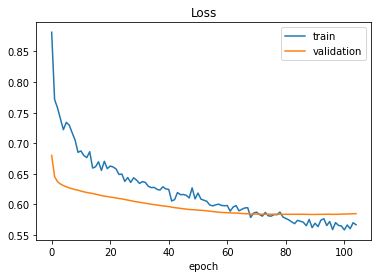

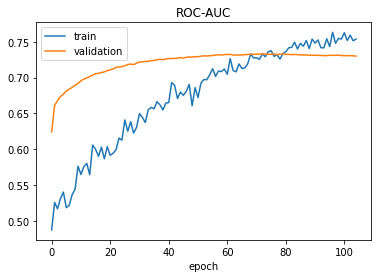

In [38]:
# Loss
plt.plot(hist.history["loss"], label="train")
plt.plot(hist.history["val_loss"], label="validation")
plt.legend()
plt.xlabel('epoch')
plt.title("Loss")
plt.show()

# ROC-AUC
plt.plot(hist.history["auc"], label="train")
plt.plot(hist.history["val_auc"], label="validation")
plt.legend()
plt.xlabel('epoch')
plt.title("ROC-AUC")
plt.show()

### Step 5: Evaluate the model performance

In [39]:
# Loss, Accuracy & ROC-AUC
model.evaluate(X_test, y_test)

1050/1050 [==============================] - 0s 60us/sample - loss: 0.5560 - acc: 0.7248 - auc: 0.7700


[0.5560212482724871, 0.7247619, 0.7700453]

### Step 6: Predict unseen data

In [41]:
# Generates output predictions for the input samples
model.predict(X_dep).flatten()

array([0.55936456, 0.10080809, 0.12739728, ..., 0.6755673 , 0.48361725,
       0.5201091 ], dtype=float32)

In [42]:
# Get class labels
np.where(model.predict(X_dep) > 0.5, 1, 0).flatten()

array([1, 0, 0, ..., 1, 0, 1])

In [44]:
#Make submissions: (결과) 0.762053
t = pd.Timestamp.now()
fname = f"dnn_submission_{t.month:02}{t.day:02}{t.hour:02}{t.minute:02}.csv"
pd.DataFrame({'cust_id': ID_dep, 'gender': model.predict(X_dep).flatten()}).to_csv(fname, index=False)
print(f"'{fname}' is ready to submit.")

'dnn_submission_12151436.csv' is ready to submit.


###  Step 7: Save the model for future use

In [38]:
# pickle 형식으로 저장
# with open('nn_model.pkl', 'wb') as f:
#    pickle.dump(model, f)

# 추후 저장한 모형 불러올 때: 
# model = pd.read_pickle('nn_model.pkl')

In [39]:
# h5 형식으로 저장
# model.save('nn_model.h5')

# 추후 저장한 모형 불러올 때: 
# model = load_model('nn_model.h5')

<font color="#CC3D3D"><p>
# End